# Text Classification:

## Data
<pre>
1. we have total of 20 types of documents(Text files) and total 18828 documents(text files).
2. You can download data from this <a href='https://drive.google.com/open?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM'>link</a>, in that you will get documents.rar folder. <br>If you unzip that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. 
so from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.
5. Below we provided count plot of all the labels in our data. 
</pre>

In [1]:
### count plot of all the class labels. 

## Assignment:

#### sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

### Preprocessing:
<pre>
useful links: <a href='http://www.pyregex.com/'>http://www.pyregex.com/</a>

<font color='blue'><b>1.</b></font> Find all emails in the document and then get the text after the "@". and then split those texts by '.' 
after that remove the words whose length is less than or equal to 2 and also remove'com' word and then combine those words by space. 
In one doc, if we have 2 or more mails, get all.
<b>Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->[dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3" </b> 
append all those into one list/array. ( This will give length of 18828 sentences i.e one list for each of the document). 
Some sample output was shown below. 

> In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]

preprocessing:
[jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyx cs du edu mimsy umd edu cs umd edu] ==> 
[nyx edu mimsy umd edu umd edu]

<font color='blue'><b>2.</b></font> Replace all the emails by space in the original text. 
</pre>

In [ ]:
# we have collected all emails and preprocessed them, this is sample output
preprocessed_email

array(['juliet caltech edu',
       'coding bchs edu newsgate sps mot austlcm sps mot austlcm sps mot com  dna bchs edu',
       'batman bmd trw', ..., 'rbdc wsnc org dscomsa desy zeus  desy',
       'rbdc wsnc org morrow stanford edu pangea Stanford EDU',
       'rbdc wsnc org apollo apollo'], dtype=object)

In [ ]:
len(preprocessed_email)

18828

<pre>
<font color='blue'><b>3.</b></font> Get subject of the text i.e. get the total lines where "Subject:" occur and remove 
the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
<b>Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> You have to get "Gospel Dating"</b> 
Save all this data into another list/array. 

<font color='blue'><b>4.</b></font> After you store it in the list, Replace those sentances in original text by space.

<font color='blue'><b>5.</b></font> Delete all the sentances where sentence starts with <b>"Write to:"</b> or <b>"From:"</b>.
> In the above sample document check the 2nd line, we should remove that

<font color='blue'><b>6.</b></font> Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"


<font color='blue'><b>7.</b></font> Delete all the data which are present in the brackets. 
In many text data, we observed that, they maintained the explanation of sentence 
or translation of sentence to another language in brackets so remove all those.
<b>Eg: "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)" --> "AAIC-The course that gets you HIRED"</b>

> In the above sample document check the 4nd line, we should remove that "(Charley Wingate)"


<font color='blue'><b>8.</b></font> Remove all the newlines('\n'), tabs('\t'), "-", "\".

<font color='blue'><b>9.</b></font> Remove all the words which ends with <b>":"</b>.
<b>Eg: "Anyword:"</b>
> In the above sample document check the 4nd line, we should remove that "writes:"


<font color='blue'><b>10.</b></font> Decontractions, replace words like below to full words. 
please check the donors choose preprocessing for this 
<b>Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will </b>

<b> There is no order to do point 6 to 10. but you have to get final output correctly</b>

<font color='blue'><b>11.</b></font> Do chunking on the text you have after above preprocessing. 
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating <b>"_"</b>. 
And remove the phrases/named entities if that is a "Person". 
You can use <b>nltk.ne_chunk</b> to get these. 
Below we have given one example. please go through it. 

useful links: 
<a href='https://www.nltk.org/book/ch07.html'>https://www.nltk.org/book/ch07.html</a>
<a href='https://stackoverflow.com/a/31837224/4084039'>https://stackoverflow.com/a/31837224/4084039</a>
<a href='http://www.nltk.org/howto/tree.html'>http://www.nltk.org/howto/tree.html</a>
<a href='https://stackoverflow.com/a/44294377/4084039'>https://stackoverflow.com/a/44294377/4084039</a>
</pre>

In [ ]:
#i am living in the New York
print("i am living in the New York -->", list(chunks))
print(" ")
print("-"*50)
print(" ")
#My name is Srikanth Varma
print("My name is Srikanth Varma -->", list(chunks1))

i am living in the New York --> [('i', 'NN'), ('am', 'VBP'), ('living', 'VBG'), ('in', 'IN'), ('the', 'DT'), Tree('GPE', [('New', 'NNP'), ('York', 'NNP')])]
 
--------------------------------------------------
 
My name is Srikanth Varma --> [('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), Tree('PERSON', [('Srikanth', 'NNP'), ('Varma', 'NNP')])]


<pre>We did chunking for above two lines and then We got one list where each word is mapped to a 
POS(parts of speech) and also if you see "New York" and "Srikanth Varma", 
they got combined and represented as a tree and "New York" was referred as "GPE" and "Srikanth Varma" was referred as "PERSON". 
so now you have to Combine the "New York" with <b>"_"</b> i.e "New_York"
and remove the "Srikanth Varma" from the above sentence because it is a person.</pre>

<pre>
<font color='blue'><b>13.</b></font> Replace all the digits with space i.e delete all the digits. 
> In the above sample document, the 6th line have digit 100, so we have to remove that.

<font color='blue'><b>14.</b></font> After doing above points, we observed there might be few word's like
 <b> "_word_" (i.e starting and ending with the _), "_word" (i.e starting with the _),
  "word_" (i.e ending with the _)</b> remove the <b>_</b> from these type of words. 

<font color='blue'><b>15.</b></font>  We also observed some words like <b> "OneLetter_word"- eg: d_berlin, 
"TwoLetters_word" - eg: dr_berlin </b>, in these words we remove the "OneLetter_" (d_berlin ==> berlin) and 
"TwoLetters_" (de_berlin ==> berlin). i.e remove the words 
which are length less than or equal to 2 after spliiting those words by "_". 

<font color='blue'><b>16.</b></font> Convert all the words into lower case and lowe case 
and remove the words which are greater than or equal to 15 or less than or equal to 2.

<font color='blue'><b>17.</b></font> replace all the words except "A-Za-z_" with space. 

<font color='blue'><b>18.</b></font> Now You got Preprocessed Text, email, subject. create a dataframe with those. 
Below are the columns of the df. 
</pre>

In [ ]:
data.columns

Index(['text', 'class', 'preprocessed_text', 'preprocessed_subject',
       'preprocessed_emails'],
      dtype='object')


In [ ]:
data.iloc[400]

text                    From: arc1@ukc.ac.uk (Tony Curtis)\r\r\r\nSubj...
class                                                         alt.atheism
preprocessed_text       said re is article if followed the quoting rig...
preprocessed_subject                                christian morality is
preprocessed_emails                                   ukc mac macalstr edu
Name: 567, dtype: object


### To get above mentioned data frame --> Try to Write Total Preprocessing steps in One Function Named Preprocess as below. 

In [1]:
import re
import nltk

email_rx = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
tag_re = r'<\s*.*?\s*>'
bracket_re = r'\(\s*.*?\s*\)'
colan_rx = r'\w*\s*:'
underscore_re = r'_+\w*|\w*_'

def is_email(email):
    if(re.fullmatch(email_rx, email)):
        return True
    return False

In [2]:
# Point 1
def clean_email(email_list):
    final_output = ''
    for email in email_list:
        process_email = [ txt for txt in email.split("@")[1].split('.') if len(txt) >2 and txt!='com']
        for token in process_email:
            final_output += token + ' '
        # print(email,process_email,final_output)
    return final_output
# Point 2
def clean_subject(line):
    subject = re.sub(colan_rx,'',line)
    subject = re.sub(pattern='\n',repl=' ',string=subject)
    subject = re.sub(pattern='\t',repl=' ',string=subject)
    subject = re.sub(pattern=r'[^\w+|\s*]',repl = '', string =subject)
    # print(line,"\n",subject)
    return subject

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
#Point 11 12
def remove_person_and_comdine(text):
    # tokenize then do pos then pass it to ne_chuking
    tokens = nltk.tokenize.word_tokenize(text)
    pos_tagged = nltk.pos_tag(tokens)
    id_txt = nltk.chunk.ne_chunk(pos_tagged)
    output = ''
    for elm in list(id_txt):
        if type(elm) is tuple:
            if elm[1] != 'PERSON':
                output += elm[0] + ' '
        else:
            if elm.label() != 'PERSON':
                txt = elm.leaves()
                processed = ''
                for word in txt:
                    processed += word[0] + '_'
                if processed[-1] =='_':
                    output += processed[:-1]
    return output


def preprocess(Input_Text):# The input is a list of lines on text 
    """Do all the Preprocessing as shown above and
    return a tuple contain preprocess_email,preprocess_subject,preprocess_text for that Text_data"""

    email_list  = re.findall(email_rx,Input_Text)# Point 1
    list_of_preproessed_emails = clean_email(email_list)# Point 1
    
    Input_Text = re.sub(email_rx," ",Input_Text)# Point 2

    # print("Emails Removed : \n",Input_Text)
    
    p_text = ''# Processed text
    subject = ''
    for line in Input_Text.split('\n'):
        if line.find("Subject:") != -1:
            subject += clean_subject(line)# Point 3
            p_text+= ' '# Point 4
        else:
            if line.find("Write to:") == -1 and line.find("From:") == -1:# Point 5
                p_text += line + ' '
    # print("Subject write and from removed \n: ",p_text)

    p_text = re.sub(pattern=tag_re,repl=' ',string=p_text)# Point 6
    p_text = re.sub(pattern=bracket_re,repl=' ',string=p_text)# Point 7
    p_text = re.sub(pattern='\n',repl=' ',string=p_text)# Point 8
    p_text = re.sub(pattern='\t',repl=' ',string=p_text)# Point 8
    p_text = p_text.replace('\\',' ')# Point 8
    # print("Tags brackets \\n \\t \\ is removed : ",p_text)
    p_text = re.sub(r'\s+',' ',p_text)
    # print("Important: \n",p_text.split(' '))
    final_text = ''
    for word in p_text.split(' '):# Point 9
        
        if len(word) > 0 and word[-1] != ':':
            final_text+= word + ' '
    # print("Words ending with colan removed : \n",final_text)
    final_text = decontracted(final_text)# Point 10
    # print("Words decontracted :\n",final_text)
    # Chunking
    final_text = re.sub(r'[^\w+|\s*]',' ',final_text)
    
    final_text = remove_person_and_comdine(final_text) 
    # print("Chucking step is done : \n",final_text)    
    # Point 11,12
    final_text = re.sub(pattern='\d+',repl=' ',string=final_text)# Point 13
    final_text = re.sub(pattern=underscore_re,repl='',string=final_text)# Point 14
    #Point 15

    final_text = final_text.lower()# Point 16
    
    # print("Impofinal_text\n",final_text)
    
    p_text = ''
    for word in final_text.split(" "):
        if len(word)>14 or len(word)<3:
            continue
        else:
            if re.fullmatch('[a-zA-Z_]*',word) is not None:
                p_text += word + ' ' 
    # print("Final text :\n",p_text)   
    # print(list_of_preproessed_emails,subject,p_text)
    return (list_of_preproessed_emails,subject,p_text)

In [3]:
file_path = "/home/bhoomeendra/Applied ai/Assignment/20_CNN_with_textdata/documents/alt.atheism_49960.txt"
input_text = open(file_path,'r').read()
print(input_text)
preprocess(input_text)

FileNotFoundError: [Errno 2] No such file or directory: '/home/bhoomeendra/Applied ai/Assignment/20_CNN_with_textdata/documents/alt.atheism_49960.txt'

In [4]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
test = "i am living in the New York "
remove_person_and_comdine(test)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home2/sisodiya.bhoomendra/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home2/sisodiya.bhoomendra/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /home2/sisodiya.bhoomendra/nltk_data...
[nltk_data]   Package words is already up-to-date!


'i am living in the New_York'

In [6]:
import os 
os.getcwd()

'/home2/sisodiya.bhoomendra/Applied_ai/21_CNN_with_textdata'

In [7]:
from glob import glob
from tqdm import tqdm 
doc_path = "/home/bhoomeendra/Applied ai/Assignment/20_CNN_with_textdata/documents/*"
ada_path = '/home2/sisodiya.bhoomendra/Applied_ai/21_CNN_with_textdata/documents/*'
processed = []
file_paths = []
count = 0
label = []
    
for file_path in tqdm(glob(ada_path)):
    file_paths.append(file_path.split('/')[-1])
    # print(file_path)
    file = open(file_path,'r')
    try:
        input_text = file.read()
        label.append(file_path.split('/')[-1].split('_')[0])
        #processed.append(preprocess(input_text))
        file.close()
    except BaseException as e:
        count+=1
        file.close()
        continue
print("These are the number of file which i am not able to open ",count)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18828/18828 [00:16<00:00, 1116.38it/s]

These are the number of file which i am not able to open  72


import pandas as pd
df  = pd.DataFrame(processed)
df.head()
df.to_csv("preprocessed.csv")

In [8]:
import pandas as pd
table = pd.read_csv('preprocessed.csv')
processed = table.values.tolist()

### Code checking:

<font color='red' size=4>
After Writing preprocess function. call that functoin with the input text of 'alt.atheism_49960' doc and print the output of the preprocess function
<br>
This will help us to evaluate faster, based on the output we can suggest you if there are any changes.
</font>

### After writing Preprocess function, call the function for each of the document(18828 docs) and then create a dataframe as mentioned above.

### Training The models to Classify: 

<pre>
1. Combine "preprocessed_text", "preprocessed_subject", "preprocessed_emails" into one column. use that column to model. 

2. Now Split the data into Train and test. use 25% for test also do a stratify split. 

3. Analyze your text data and pad the sequnce if required. 
Sequnce length is not restricted, you can use anything of your choice. 
you need to give the reasoning

4. Do Tokenizer i.e convert text into numbers. please be careful while doing it. 
if you are using tf.keras "Tokenizer" API, it removes the <b>"_"</b>, but we need that.

5. code the model's ( Model-1, Model-2 ) as discussed below 
and try to optimize that models.  

6. For every model use predefined Glove vectors. 
<b>Don't train any word vectors while Training the model.</b>

7. Use "categorical_crossentropy" as Loss. 

8. Use <b>Accuracy and Micro Avgeraged F1 score</b> as your as Key metrics to evaluate your model. 

9.  Use Tensorboard to plot the loss and Metrics based on the epoches.

10. Please save your best model weights in to <b>'best_model_L.h5' ( L = 1 or 2 )</b>. 

11. You are free to choose any Activation function, learning rate, optimizer.
But have to use the same architecture which we are giving below.

12. You can add some layer to our architecture but you <b>deletion</b> of layer is not acceptable.

13. Try to use <b>Early Stopping</b> technique or any of the callback techniques that you did in the previous assignments.

14. For Every model save your model to image ( Plot the model) with shapes 
and inlcude those images in the notebook markdown cell, 
upload those imgages to Classroom. You can use "plot_model" 
please refer <a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>this</a> if you don't know how to plot the model with shapes. 

</pre>

In [9]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
import re

In [10]:
X = []
y = label
thresh = 400
for x in tqdm(processed):
    text = ''
    if type(x[1]) is str:
        text += x[1]
    if type(x[2]) is str:
        text += x[2]
    if type(x[3]) is str:
        text += x[3]
    text = re.sub('\s+',' ',text)
    # print(text)
    if len(text.split(' ')) > thresh:
        final = ''
        count = 0 
        for word in text.split(' '):
            final += word+' '
            count += 1
            if count>= thresh:
                break
        X.append(final.strip())
    else:
        X.append(text)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18756/18756 [00:01<00:00, 12667.63it/s]


In [11]:
lengths = [len(p.split(' ')) for p in X]
min(lengths),max(lengths)

(2, 400)

In [12]:
import numpy as np
np.percentile(lengths,90)

318.0

<AxesSubplot:ylabel='Count'>

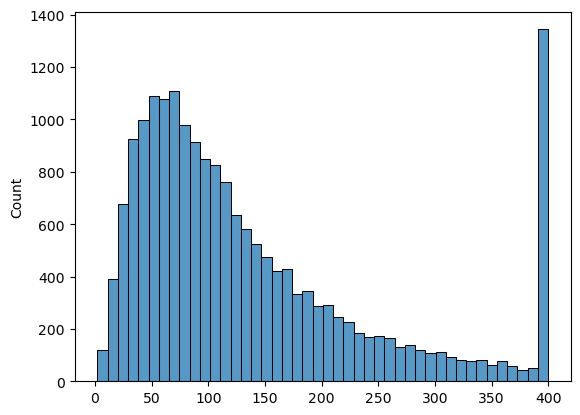

In [13]:
sns.histplot(lengths)

In [14]:
len(X),len(y)

(18756, 18756)

In [15]:
type(X)

list

In [16]:
X[:3]

['hpwad WAD COM hpwbe007 wad Need help writing MS EXCEL macrofor student begin for assignments begin score score end score foundend could not you simply use minas you use sumand than subtract from sumgermany fromut fritze waldbronn analytic division waldbronn germany ',
 'ecst csuchico edu netcom netcom vega iii enrico tmc edu netcom netcom ecst csuchico edu To be or Not to be a Disaster article article article not all you are apparently just another member the leftnot all not member the rightor even centerin fact not consider myself very religious all this will probably result flames now fact phil you should leave religion out just clouds the issue the religous left worships trees rivers the planet and hates people and the religious right worships engines smokestacks landfills and hates people what does this name calling have with anything you are claiming about the truth environmental disaster nothing that have read this thread nor heard from anyone have talked would suggest that peo

In [17]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
tokenizer.fit_on_texts(X)

In [18]:
a = tokenizer.word_index

In [19]:
len(a)

115654

In [20]:
for word,idx in a.items():
    if idx == 0:
        print(idx,word)

In [21]:
data_X = tokenizer.texts_to_sequences(X)

In [22]:
padded_data = tf.keras.preprocessing.sequence.pad_sequences(data_X, padding='post')

In [23]:
padded_data.shape

(18756, 411)

In [24]:
padded_data[4]

array([ 1127,   416,     7,  5367,  1012,    23,   333,  1171,    28,
         222, 37620,   768, 25072,   481,    22,  1226,   699,     2,
          27,   731,  2943,  1401,   937,     6,    38,   333,  2464,
          14,     8,  1337,   864,    43,  1428,     5,  5457,    10,
        1191,    11,  8538,     1,  2066,    29,  2464,     1,    22,
          29,    17,   678,     1,  1317,    17,     4,  1119,     1,
        3536,     1,  1218,   559,    17,     1,  1218,  1119,     1,
        3536,     1,  1317,     1,  6627,     1,  3562,   228,    17,
       11726,   109,     2,     1, 22042,     1,  8539,    17,  3149,
         177,   109,  8538,     4,  4754,  1617,    24,  1439,   307,
        4489,    97,  4436,    71,  2170,   448,    87,   538,    10,
         760, 37621,    28,   249,     6,    82,    29,   582,   371,
           1,   752,    15,   820,    24,     4,  2379,   976,    11,
        4980,  1002,   155,    41,    26,   485,   207,  1825,  3669,
         747,     5,

In [25]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
oneHot = OneHotEncoder(handle_unknown='ignore')

In [26]:
y_np = np.array(y)

In [27]:
y_np[:10]

array(['comp.os.ms-windows.misc', 'comp.sys.mac.hardware',
       'comp.sys.mac.hardware', 'rec.motorcycles', 'rec.autos',
       'comp.os.ms-windows.misc', 'rec.sport.hockey', 'sci.crypt',
       'comp.sys.mac.hardware', 'talk.politics.mideast'], dtype='<U24')

In [28]:
y_onehot = oneHot.fit_transform(y_np.reshape(-1,1))

In [29]:
oneHot.categories_

[array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
        'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
        'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
        'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
        'sci.electronics', 'sci.med', 'sci.space',
        'soc.religion.christian', 'talk.politics.guns',
        'talk.politics.mideast', 'talk.politics.misc',
        'talk.religion.misc'], dtype='<U24')]

In [30]:
y_onehot.shape

(18756, 20)

In [31]:
y_final = y_onehot.toarray()

In [32]:
X_train,X_test,y_train,y_test = train_test_split(padded_data,y_final,stratify=y_final,test_size=0.2)
X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train,stratify=y_train,test_size=0.1)

In [33]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((13503, 411), (3752, 411), (13503, 20), (3752, 20))

In [34]:
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
glove_emb = loadGloveModel('glove.6B.100d.txt')

Loading Glove Model


400000it [00:12, 32551.64it/s]

Done. 400000  words loaded!


In [35]:
d = glove_emb['the'].shape[0]

In [36]:
d

100

In [37]:
vocab_size = len(a)+1

In [38]:
vocab_size

115655

In [40]:
embeding = np.zeros((vocab_size,d))

In [41]:
count = 0
not_found = [] 
for word,idx in a.items():
    if glove_emb.get(word) is not None:
        count+=1
        embeding[idx] = glove_emb[word]
    else:
        not_found.append(word)

In [42]:
count

45042

In [43]:
not_found[:500]

['universityof',
 'utexas',
 'optilink',
 'iastate',
 'udel',
 'uchicago',
 'uxa',
 'umich',
 'colostate',
 'psuvm',
 'fnal',
 'xterm',
 'dseg',
 'uoknor',
 'utoronto',
 'ingr',
 'solntze',
 'uwaterloo',
 'vnet',
 'acns',
 'uicvm',
 'bony1',
 'bhj',
 'rtsg',
 'sdpa',
 'wustl',
 'clh',
 'calpoly',
 'rwing',
 'cunixb',
 'ulowell',
 'utkvm1',
 'thanx',
 'dividian',
 'enet',
 'dscomsa',
 'mcrcim',
 'okstate',
 'cbnewsj',
 'ccwf',
 'uky',
 'osrhe',
 'd012s658',
 'ultb',
 'ucsu',
 'forsale',
 'turksand',
 'colormap',
 'msdos',
 'umanitoba',
 'spdcc',
 'cnsvax',
 'uwec',
 'departmentof',
 'atlantaga',
 'thanksin',
 'royalroads',
 'cunyvm',
 'ctron',
 'ucalgary',
 'bdis',
 'xdm',
 'uio',
 'imho',
 'latech',
 'thanksfor',
 'openwindows',
 'mchp',
 'dbstu1',
 'mksol',
 'isarticle',
 'uxh',
 'msus',
 'ux4',
 'msstate',
 'washingtondc',
 'yfn',
 'utzoo',
 'buphy',
 'ucdavis',
 'chinet',
 'godis',
 'survivorsarticle',
 'isabus',
 'okcforum',
 'ux1',
 'acpub',
 'newtestament',
 'centerfor',
 'morear

In [44]:
in_len = padded_data.shape[1]

In [54]:
d

100

In [45]:
in_len

411

In [51]:
input_layer = tf.keras.Input(shape=(in_len,),dtype= tf.int32)

embbeding_layer = tf.keras.layers.Embedding(input_dim= vocab_size,output_dim = d,weights=[embeding],input_length=in_len, trainable=False)(input_layer)


layer_1_conv_4 = tf.keras.layers.Conv1D(filters = 5, kernel_size = 3, strides=1, activation='relu')(embbeding_layer)
layer_1_conv_2 = tf.keras.layers.Conv1D(filters = 5, kernel_size = 2, strides=1, activation='relu')(embbeding_layer)
layer_1_conv_1 = tf.keras.layers.Conv1D(filters = 5, kernel_size = 1, strides=1, activation='relu')(embbeding_layer)

layer_2_concat = tf.keras.layers.concatenate([layer_1_conv_4, layer_1_conv_2, layer_1_conv_1],axis=1)
max_pool_layer_1 = tf.keras.layers.MaxPool1D( pool_size=7,strides=1)(layer_2_concat)

layer_2_conv_4 = tf.keras.layers.Conv1D(filters = 10, kernel_size = 4, strides=1, activation='relu')(max_pool_layer_1)
layer_2_conv_2 = tf.keras.layers.Conv1D(filters = 10, kernel_size = 3, strides=1, activation='relu')(max_pool_layer_1)
layer_2_conv_1 = tf.keras.layers.Conv1D(filters = 10, kernel_size = 2, strides=1, activation='relu')(max_pool_layer_1)

layer_2_concat = tf.keras.layers.concatenate([layer_2_conv_4, layer_2_conv_2, layer_2_conv_1],axis=1)
max_pool_layer_2 = tf.keras.layers.MaxPool1D( pool_size = 5,strides=1)(layer_2_concat)

layer_2_conv_f = tf.keras.layers.Conv1D(filters = 1, kernel_size = 10, strides=1, activation='relu')(max_pool_layer_2)
flat_layer = tf.keras.layers.Flatten()(layer_2_conv_f)

dense_layer_1 = tf.keras.layers.Dense(32,activation='relu')(flat_layer)
dropout_layer = tf.keras.layers.Dropout(.5)(dense_layer_1)
output_layer = tf.keras.layers.Dense(20,activation='softmax')(dropout_layer)

model = tf.keras.Model(input_layer,output_layer)

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01,momentum = 0.7)

model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['categorical_accuracy'])


test = tf.math.add(input_layer,0)
test_model = tf.keras.Model(input_layer,test)
test_model.compile(tf.keras.optimizers.RMSprop(0.001), loss='mse')

X_train[0].shape

test_vec = np.zeros(shape=(411,))

test_vec[0] = 1

output = tf.keras.layers.Embedding(input_dim= vocab_size,output_dim = d,weights=[embeding],input_length=in_len, trainable=False)(test_model.predict(test_vec))

one = output[0].numpy()

one

one_emb = embeding[1,:].astype('float32')
one_emb

for a,b in zip (one,one_emb):
    if a != b:
        print("Error : ",a ,b)
        break
print("Sucess")

np.array_equal(embeding[1,:] , one)

In [52]:
model.summary()
# img_file = './model_arch.png'
# tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 411)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 411, 100)     11565500    ['input_2[0][0]']                
                                                                                                  
 conv1d_7 (Conv1D)              (None, 409, 5)       1505        ['embedding_1[0][0]']            
                                                                                                  
 conv1d_8 (Conv1D)              (None, 410, 5)       1005        ['embedding_1[0][0]']            
                                                                                            

# Callbacks

In [49]:
import datetime

class ModelMetric(tf.keras.callbacks.Callback):
    
    def __init__(self,validation_data):
        self.x_cv = validation_data[0]
        self.y_cv = validation_data[1]
    
    def on_train_begin(self, logs={}):
        ## on begin of training, we are creating a instance varible called history
        ## it is a dict with keys [loss, acc, val_loss, val_acc]
        self.history={'loss': [],'accuracy': [],'val_loss': [],'val_accuracy': [],'f1_score': [],'auc': []}

    def on_epoch_end(self, epoch, logs={}):
        loss = logs.get('loss')
        if loss is not None:
            if np.isnan(loss) or np.isinf(loss):
                print("Invalid loss and terminated at epoch {}".format(epoch))
                self.model.stop_training = True
        
        model_weights = self.model.get_weights()
        if model_weights is not None:
            if np.any([np.any(np.isnan(x)) for x in model_weights]):
                print("Invalid weight and terminated at epoch {}".format(epoch))
                self.model.stop_training = True
            
        if self.model.stop_training == False:
            print("Model Metric")
            true_positives=0
            ## on end of each epoch, we will get logs and update the self.history dict
            self.history['loss'].append(logs.get('loss'))
            self.history['accuracy'].append(logs.get('categorical_accuracy'))

            if logs.get('val_loss', -1) != -1:
                self.history['val_loss'].append(logs.get('val_loss'))
            if logs.get('val_accuracy', -1) != -1:
                self.history['val_accuracy'].append(logs.get('val_accuracy'))

def lr_setter(epoch,lr):
    if epoch%3 == 0:
        return lr*(0.95)
    return lr

logs = ModelMetric((X_cv,y_cv))
filepath   = "./model_save/weights-{epoch:02d}-{val_categorical_accuracy:.4f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, monitor='val_categorical_accuracy',  verbose=1, save_best_only=True, mode='auto')
#lrschedule = tf.keras.callbacks.LearningRateScheduler(lr_setter, verbose=1)
#reduce     = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',factor=0.9,patience=3,verbose=1)
# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', min_delta=0.005, patience=5, verbose=1)
log_dir = os.path.join("logs",'fits', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1,write_graph=True)
all_callbacks = [checkpoint,logs,tensorboard_callback]# early_stop


In [53]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_cv,y_cv), batch_size=256,callbacks = all_callbacks)

Epoch 1/10
53/53 [==============================] - ETA: 0s - loss: 2.9987 - categorical_accuracy: 0.0481
Epoch 1: val_categorical_accuracy improved from 0.05996 to 0.06462, saving model to ./model_save/weights-01-0.0646.hdf5
Model Metric
53/53 [==============================] - 3s 49ms/step - loss: 2.9987 - categorical_accuracy: 0.0481 - val_loss: 2.9943 - val_categorical_accuracy: 0.0646
Epoch 2/10
52/53 [============================>.] - ETA: 0s - loss: 2.9940 - categorical_accuracy: 0.0577
Epoch 2: val_categorical_accuracy did not improve from 0.06462
Model Metric
53/53 [==============================] - 2s 31ms/step - loss: 2.9940 - categorical_accuracy: 0.0575 - val_loss: 2.9935 - val_categorical_accuracy: 0.0633
Epoch 3/10
50/53 [===========================>..] - ETA: 0s - loss: 2.9939 - categorical_accuracy: 0.0555
Epoch 3: val_categorical_accuracy did not improve from 0.06462
Model Metric
53/53 [==============================] - 2s 31ms/step - loss: 2.9939 - categorical_accura

### Model-1: Using 1D convolutions with word embeddings

<pre>
<b>Encoding of the Text </b> --> For a given text data create a Matrix with Embedding layer as shown Below. 
In the example we have considered d = 5, but in this assignment we will get d = dimension of Word vectors we are using.
 i.e if we have maximum of 350 words in a sentence and embedding of 300 dim word vector, 
 we result in 350*300 dimensional matrix for each sentance as output after embedding layer
<img src='https://i.imgur.com/kiVQuk1.png'>
Ref: https://i.imgur.com/kiVQuk1.png

<b>Reference:</b>
<a href='https://stackoverflow.com/a/43399308/4084039'>https://stackoverflow.com/a/43399308/4084039</a>
<a href='https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/'>https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</a>

<b><a href='https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work'>How EMBEDDING LAYER WORKS </a></b>

</pre>

### Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

<img src='https://i.imgur.com/fv1GvFJ.png'>
ref: 'https://i.imgur.com/fv1GvFJ.png'

<pre>
1. all are Conv1D layers with any number of filter and filter sizes, there is no restriction on this.

2. use concatenate layer is to concatenate all the filters/channels. 

3. You can use any pool size and stride for maxpooling layer.

4. Don't use more than 16 filters in one Conv layer becuase it will increase the no of params. 
( Only recommendation if you have less computing power )

5. You can use any number of layers after the Flatten Layer.
</pre>

### Model-2 : Using 1D convolutions with character embedding

<pre>
<pre><img src="https://i.ytimg.com/vi/CNY8VjJt-iQ/maxresdefault.jpg" width="70%">
Here are the some papers based on Char-CNN
 1. Xiang Zhang, Junbo Zhao, Yann LeCun. <a href="http://arxiv.org/abs/1509.01626">Character-level Convolutional Networks for Text Classification</a>.NIPS 2015
 2. Yoon Kim, Yacine Jernite, David Sontag, Alexander M. Rush. <a href="https://arxiv.org/abs/1508.06615">Character-Aware Neural Language Models</a>. AAAI 2016
 3. Shaojie Bai, J. Zico Kolter, Vladlen Koltun. <a href="https://arxiv.org/pdf/1803.01271.pdf">An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling</a>
 4. Use the pratrained char embeddings <a href='https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt'>https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt</a>
</pre>

<img src='https://i.imgur.com/EuuoJtr.png'>